## gmm

## 라이브러리 import

In [1]:
import pandas as pd  #데이터 분석 라이브러리
import numpy as np # 계산 라이브러리
from sklearn.mixture import GaussianMixture #gmm 라이브러리
from sklearn.decomposition import PCA #주성분 분석 라이브러리

import matplotlib as mpl # 그래프 라이브러리
import plotly.express as px #그래프 라이브러리
import seaborn as sns #seaborn 그래프 라이브러리

import matplotlib.pyplot as plt #pyplot 그래프 라이브러리
import matplotlib.font_manager as fm  #그래프 폰트 라이브러리
%matplotlib inline

fm._rebuild() #json파일에 업데이트 해주기

plt.rc("font", family="Malgun Gothic") #폰트 맑은 고딕 적용


## 데이터 불러오기

In [2]:
df1 = pd.read_csv('../Data/Preprocessing/활성화지표_추가본.csv',encoding='cp949') #데이터 불러오기
df1 = df1.drop(df1.index[275]) #항동 제거

In [3]:
df1.head()

,자치구,행정동명,행정동코드,과거대비인구변화(%),최근인구변화(연속감소년수),과거대비사업체변화(%),최근사업체변화(연속감소년수),노후건축물비율(%),노인인구비율,기초생활 대상자 비율
0,종로구,사직동,1111053000,-13.703589,2,0.338696,1,73.636364,0.187946,0.013155
1,종로구,삼청동,1111054000,-71.395349,3,-2.691790,1,77.192982,0.231695,0.014094
2,종로구,부암동,1111055000,-28.333333,5,4.251386,1,75.547703,0.177973,0.014517
3,종로구,평창동,1111056000,-4.272303,4,2.092050,0,71.133568,0.182865,0.007373
4,종로구,무악동,1111057000,-37.690513,3,-15.185185,4,54.545455,0.169926,0.018040


In [4]:
df1.columns #데이터 컬럼 확인

Index(['자치구', '행정동명', '행정동코드', '과거대비인구변화(%)', '최근인구변화(연속감소년수)', '과거대비사업체변화(%)',
       '최근사업체변화(연속감소년수)', '노후건축물비율(%)', '노인인구비율', '기초생활 대상자 비율'],
      dtype='object')

In [5]:
hang = df1['행정동코드'] #행정동코드만 따로 분리

In [6]:
df1_use = df1[['과거대비인구변화(%)','최근인구변화(연속감소년수)','과거대비사업체변화(%)','최근사업체변화(연속감소년수)','노후건축물비율(%)', '노인인구비율', '기초생활 대상자 비율']]
# 최종 사용 변수


## aic , bic

In [7]:
#gmm은 elbow 대신 이거 씀
#이게 작을수록 좋다
#https://berrrrr.github.io/datascience/2020/11/16/hands-on-ml-9/
k = range(1,20)
for i in k:
    gmm_model = GaussianMixture(n_components=i, random_state=42)
    gmm_mm = gmm_model.fit_predict(df1_use)
    b = gmm_model.bic(df1_use)
    a = gmm_model.aic(df1_use)
    print(i,'bic :',b,'aic :',a)

1 bic : 9003.006495856584 aic : 8861.348469589964
2 bic : 8859.50300146333 aic : 8572.139576751044
3 bic : 8763.81891710218 aic : 8330.750093944229
4 bic : 8813.27873587116 aic : 8234.50451426754
5 bic : 8924.114229021056 aic : 8199.634608971772
6 bic : 8925.25307430925 aic : 8055.068055814301
7 bic : 9082.404852544898 aic : 8066.514435604283
8 bic : 9312.664157940246 aic : 8151.068342553964
9 bic : 9414.409302988168 aic : 8107.10808915622
10 bic : 9464.063834807708 aic : 8011.057222530095
11 bic : 7497.535138747179 aic : 5898.8231280239
12 bic : 7555.242299415942 aic : 5810.824890246997
13 bic : 7704.439386712433 aic : 5814.316579097821
14 bic : 7875.939799126109 aic : 5840.111593065832
15 bic : 10101.920800959495 aic : 7920.387196453551
16 bic : 7918.184963779604 aic : 5590.945960827995
17 bic : 10148.92347999655 aic : 7675.979078599275
18 bic : 8207.828125208322 aic : 5589.178325365379
19 bic : 8336.356313353 aic : 5572.001115064394


## gmm

In [8]:
# GMM 적용
gmm = GaussianMixture(n_components=4, random_state=42) # n_components로 미리 군집 개수 설정
gmm_labels = gmm.fit_predict(df1_use)

# GMM 후 클러스터링 레이블을 따로 설정
df1_use['gmm_cluster'] = gmm_labels


<ipython-input-8-3cab13376c72>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_use['gmm_cluster'] = gmm_labels


In [9]:
df1_use.head() #데이터 확인

,과거대비인구변화(%),최근인구변화(연속감소년수),과거대비사업체변화(%),최근사업체변화(연속감소년수),노후건축물비율(%),노인인구비율,기초생활 대상자 비율,gmm_cluster
0,-13.703589,2,0.338696,1,73.636364,0.187946,0.013155,3
1,-71.395349,3,-2.691790,1,77.192982,0.231695,0.014094,0
2,-28.333333,5,4.251386,1,75.547703,0.177973,0.014517,3
3,-4.272303,4,2.092050,0,71.133568,0.182865,0.007373,3
4,-37.690513,3,-15.185185,4,54.545455,0.169926,0.018040,1


In [10]:
df1_use = pd.concat([df1_use,hang],axis=1) #행정동 코드 붙이기

In [11]:
df1_use.head()

,과거대비인구변화(%),최근인구변화(연속감소년수),과거대비사업체변화(%),최근사업체변화(연속감소년수),노후건축물비율(%),노인인구비율,기초생활 대상자 비율,gmm_cluster,행정동코드
0,-13.703589,2,0.338696,1,73.636364,0.187946,0.013155,3,1111053000
1,-71.395349,3,-2.691790,1,77.192982,0.231695,0.014094,0,1111054000
2,-28.333333,5,4.251386,1,75.547703,0.177973,0.014517,3,1111055000
3,-4.272303,4,2.092050,0,71.133568,0.182865,0.007373,3,1111056000
4,-37.690513,3,-15.185185,4,54.545455,0.169926,0.018040,1,1111057000


## 클러스터별 데이터 분리

In [12]:
data_a = df1_use[df1_use['gmm_cluster'] == 0]
data_b = df1_use[df1_use['gmm_cluster'] == 1]
data_c = df1_use[df1_use['gmm_cluster'] == 2]
data_d = df1_use[df1_use['gmm_cluster'] == 3]

## box plot

c:\programdata\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\programdata\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


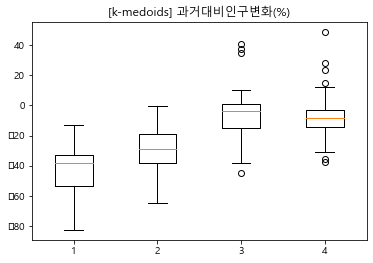

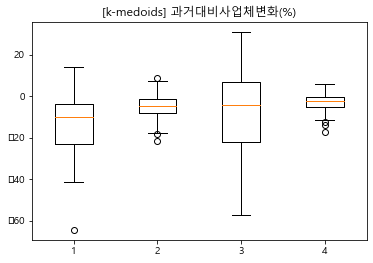

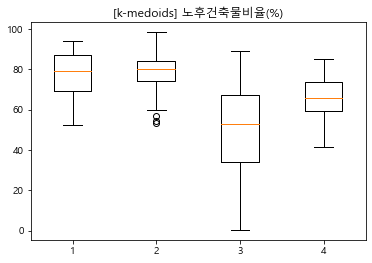

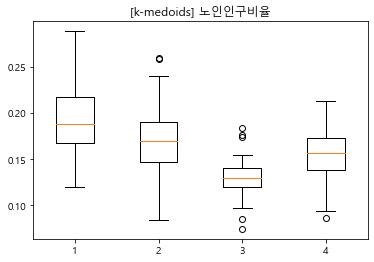

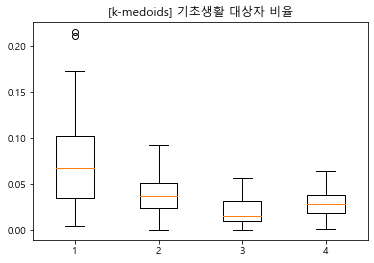

In [13]:
plot_list = ['과거대비인구변화(%)', '과거대비사업체변화(%)',
       '노후건축물비율(%)', '가구당인구수', '노인인구비율', '기초생활 대상자 비율']
count=0
for i in range(0,len(data_a.columns)-1):
    count+=1
    if count==5:
        count=0
    if data_a.iloc[:,i].name not in plot_list:
        continue
    fig, ax = plt.subplots()
    
    ax.boxplot([data_a.iloc[:,i], data_b.iloc[:,i], data_c.iloc[:,i], data_d.iloc[:,i]])

    plt.title('[k-medoids] ' + data_a.iloc[:,i].name)
    
plt.show()

In [14]:
#최근 인구 변화

df1_use.iloc[:,1].groupby([df1_use['gmm_cluster']]).count()
p_a = 42
p_b = 139
p_c = 53
p_d = 198

df1_use.iloc[:,1].groupby([df1_use['gmm_cluster']]).sum() 
s_a = 153
s_b =473
s_c = 132
s_d = 755
print('0:',s_a/p_a)
print('1:',s_b/p_b)
print('2:',s_c/p_c)
print('3:',s_d/p_d)

0: 3.642857142857143
1: 3.402877697841727
2: 2.490566037735849
3: 3.813131313131313


In [15]:
#최근 사업체 변화
df1_use.iloc[:,3].groupby([df1_use['gmm_cluster']]).sum()
s_a = 108
s_b =315
s_c = 87
s_d = 320
print('0:',s_a/p_a)
print('1:',s_b/p_b)
print('2:',s_c/p_c)
print('3:',s_d/p_d)

0: 2.5714285714285716
1: 2.2661870503597124
2: 1.6415094339622642
3: 1.6161616161616161


## PCA

In [20]:
df1_plot = df1_use[['과거대비인구변화(%)', '최근인구변화(연속감소년수)', '과거대비사업체변화(%)',
       '최근사업체변화(연속감소년수)', '노후건축물비율(%)', '노인인구비율', '기초생활 대상자 비율']]
pca = PCA(n_components=2) # 주성분 2개로 결정
printcipalComponents = pca.fit_transform(df1_plot) #주성분 분석 
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2']) #data frame 형태로 변환
df1_plot_final = pd.concat([principalDf,df1_use['gmm_cluster']],axis=1) #주성분 분석 dataframe + cluster 정보 합침
df1_plot_final


,principal component1,principal component2,gmm_cluster
0,-4.803259,-5.414629,3.0
1,47.414729,18.111318,0.0
2,8.119012,-0.692897,3.0
3,-14.425949,-7.661018,3.0
4,10.059206,23.596934,1.0
...,...,...,...
419,-8.192029,4.583837,3.0
420,-6.942935,5.715386,3.0
421,-8.972186,-8.486532,3.0
422,-11.524998,2.093691,3.0


In [21]:
df1_plot_final['gmm_cluster'] = df1_plot_final['gmm_cluster'].apply(lambda x :str(x)) #클러스터 열 데이터 형태 str로 바꾸기

## 산점도

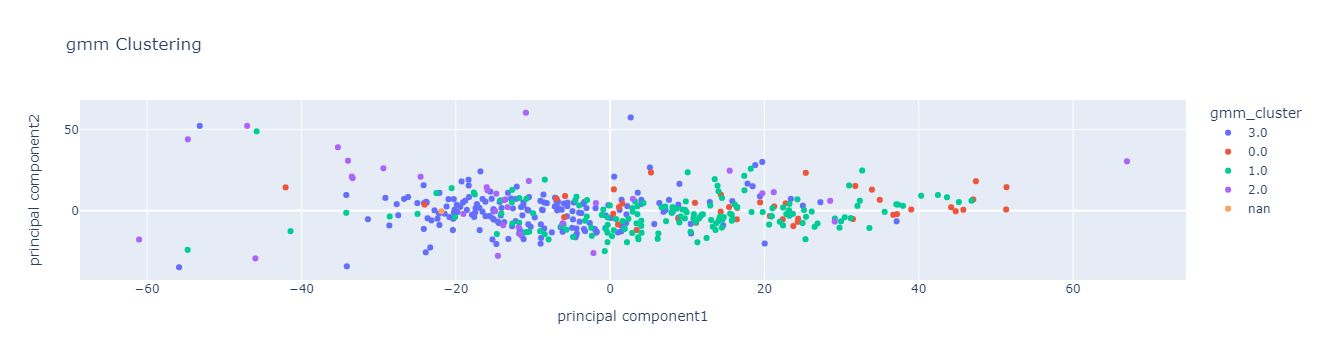

In [22]:
import plotly.express as px
fig = px.scatter(df1_plot_final, x="principal component1", y="principal component2",
                 color="gmm_cluster", # Species 열의 값에 따라서 색깔 표현
                 title='gmm Clustering' # 그래프 타이틀 지정
                )
fig.show()

c:\programdata\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 8722 missing from current font.

c:\programdata\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 8722 missing from current font.



Text(0.5, 1.0, 'GMM')

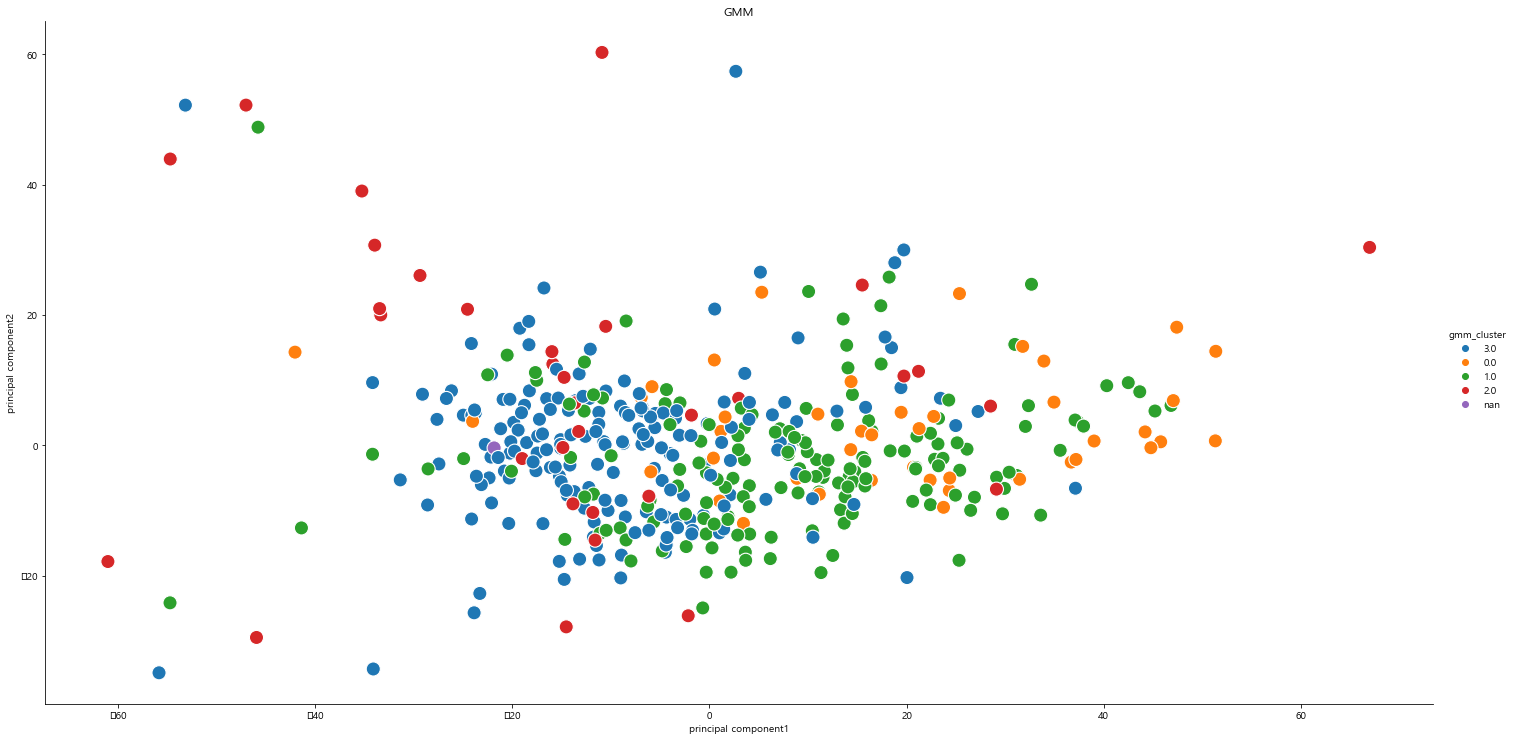

In [23]:
sns.relplot(data=df1_plot_final, x='principal component1', y='principal component2', hue='gmm_cluster', palette='tab10',s=200, kind='scatter',height=10, aspect=2)
plt.title('GMM')

## 타켓 클러스터 (cluster 0)

In [24]:
data_a_target = data_a[['과거대비인구변화(%)','최근인구변화(연속감소년수)','과거대비사업체변화(%)','최근사업체변화(연속감소년수)','노후건축물비율(%)', '노인인구비율', 
                  '기초생활 대상자 비율','행정동코드']] #타겟 클러스터 저장할 정보 저장(cluster 정보 제외)

In [25]:
data_a_target

,과거대비인구변화(%),최근인구변화(연속감소년수),과거대비사업체변화(%),최근사업체변화(연속감소년수),노후건축물비율(%),노인인구비율,기초생활 대상자 비율,행정동코드
1,-71.395349,3,-2.691790,1,77.192982,0.231695,0.014094,1111054000
6,-57.091410,5,-0.800000,1,75.487013,0.212087,0.015844,1111060000
10,-60.099208,5,-9.995818,2,91.774383,0.212609,0.076123,1111067000
18,-49.221646,2,-16.137566,4,90.170512,0.269585,0.085114,1114054000
23,-64.764320,2,-12.184664,4,94.223827,0.266904,0.065074,1114060500
34,-37.757063,5,-7.171776,1,88.413098,0.202316,0.155865,1117053000
41,-53.217680,4,-10.040706,1,81.346841,0.177490,0.026216,1117066000
57,-35.618795,5,14.190317,0,83.822297,0.140268,0.019581,1120066000
61,-53.598114,5,-12.265084,2,88.451160,0.168500,0.067353,1120079000
91,-42.260503,5,-20.799408,4,89.893617,0.155011,0.032775,1123074000


In [27]:
data_a_target.to_csv('../Data/Result/gmm_target_cluster.csv',encoding='cp949',index=False) #csv로 내보내기